In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv("/work/dataset20210830.csv")
df.head()

,ID,Gender,BAMajor,BAGPA,yrs_work,yrs_python,yrs_R,G1,G2,G3,...,G12,G13,G14,G15,G16,G17,G18,G19,G20,GPA
0,20210001,M,Computer Science,3.60,1,2,1,57.74,59.50,60.41,...,59.58,60.52,43.80,66.42,41.60,39.05,55.85,31.38,23.73,3.30
1,20210002,F,Information Systems,3.29,4,2,2,80.32,90.01,89.40,...,90.09,89.53,89.78,97.08,63.87,72.27,71.89,62.05,1.09,3.58
2,20210003,F,Computer Science,3.07,3,3,1,66.13,68.62,71.22,...,68.68,71.28,72.62,85.40,74.82,60.95,63.87,75.19,1.83,3.33
3,20210004,M,Information Systems,3.37,3,3,1,84.67,72.49,75.94,...,72.60,75.99,58.03,72.62,78.46,54.01,65.69,71.89,3.28,3.52
4,20210005,F,Electronic Engineering,3.24,2,1,1,61.93,55.70,74.97,...,55.70,75.08,68.61,39.41,49.63,46.35,46.35,44.16,20.07,3.14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1000 non-null   int64  
 1   Gender      1000 non-null   object 
 2   BAMajor     1000 non-null   object 
 3   BAGPA       1000 non-null   float64
 4   yrs_work    1000 non-null   int64  
 5   yrs_python  1000 non-null   int64  
 6   yrs_R       1000 non-null   int64  
 7   G1          1000 non-null   float64
 8   G2          1000 non-null   float64
 9   G3          1000 non-null   float64
 10  G4          1000 non-null   float64
 11  G5          1000 non-null   float64
 12  G6          1000 non-null   float64
 13  G7          1000 non-null   float64
 14  G8          1000 non-null   float64
 15  G9          1000 non-null   float64
 16  G10         1000 non-null   float64
 17  G11         1000 non-null   float64
 18  G12         1000 non-null   float64
 19  G13         1000 non-null   

In [ ]:
df["BAMajor"].value_counts()

Computer Science          278
Applied Math              199
Information Systems       193
Electronic Engineering    117
Business                   84
Others                     80
Liberal Arts               49
Name: BAMajor, dtype: int64

In [ ]:
col = 'BAGPA'
min = df[col].min()
max = df[col].max()
median = df[col].median()
mode = df[col].mode()[0]
midrange = (max - min)/2
print(col,min, max, median, mode, midrange)

BAGPA 2.5 4.0 3.27 4.0 0.75


In [ ]:
def getCentralTendency(col):
    min = df[col].min()
    max = df[col].max()
    median = df[col].median()
    mode = df[col].mode()[0]
    midrange = (max - min)/2
    print(col,min, max, median, mode, midrange)

for col in df.columns[3:]:
    getCentralTendency(col)

BAGPA 2.5 4.0 3.27 4.0 0.75
yrs_work 0 4 2.0 0 2.0
yrs_python 0 4 2.0 2 2.0
yrs_R 0 4 1.0 1 2.0
G1 20.68 100.0 71.09 71.09 39.66
G2 19.87 100.0 70.97 68.62 40.065
G3 29.6 100.0 71.22 65.07 35.2
G4 34.17 99.45 72.49 72.24 32.64
G5 20.04 100.91 73.615 80.6 40.435
G6 31.39 101.27 73.99 79.0 34.94
G7 26.33 96.66 72.49 74.48 35.165
G8 21.78 95.14 73.0 67.81 36.68
G9 28.34 97.41 71.74 78.77 34.535
G10 -0.11 74.73 43.769999999999996 0.0 37.42
G11 20.84 100.0 71.24 72.47 39.58
G12 20.07 100.0 71.11 100.0 39.965
G13 29.65 100.0 71.26 100.0 35.175
G14 11.68 98.9 52.55 52.19 43.61
G15 4.02 101.83 54.195 64.96 48.905
G16 9.85 102.56 54.75 62.41 46.355000000000004
G17 6.93 93.43 52.55 55.47 43.25
G18 4.74 90.52 53.29 45.98 42.89
G19 8.03 94.89 51.47 62.05 43.43
G20 -0.02 55.85 19.155 0.0 27.935000000000002
GPA 2.54 4.06 3.33 3.14 0.7599999999999998


In [ ]:
col = 'BAGPA'
range = df[col].max() - df[col].min()
quantiles = df[col].quantile([0.25, 0.5, 0.75])
IQR = quantiles[0.75] - quantiles[0.25]
var = df[col].var()
std = df[col].std()

print(col, range, quantiles[0.25], quantiles[0.5], quantiles[0.75], IQR, var, std)


BAGPA 1.5 3.13 3.27 3.46 0.33000000000000007 0.0935744815815816 0.30589946319269934


In [ ]:
def getDispersion(col):
    range = df[col].max() - df[col].min()
    quantiles = df[col].quantile([0.25, 0.5, 0.75])
    IQR = quantiles[0.75] - quantiles[0.25]
    var = df[col].var()
    std = df[col].std()
    print(col, range, quantiles[0.25], quantiles[0.5], quantiles[0.75], IQR, var, std)

for col in df.columns[3:]:
    getDispersion(col)

BAGPA 1.5 3.13 3.27 3.46 0.33000000000000007 0.0935744815815816 0.30589946319269934
yrs_work 4 0.0 2.0 3.0 3.0 1.742933933933934 1.3202022322106315
yrs_python 4 1.0 2.0 3.0 2.0 1.2355865865865867 1.1115694249962917
yrs_R 4 1.0 1.0 2.0 1.0 1.0255815815815816 1.0127100185055846
G1 79.32 61.35 71.09 80.32 18.96999999999999 216.41265075115118 14.710970421802607
G2 80.13 61.01 70.97 78.77 17.759999999999998 174.6528450850851 13.215628819132485
G3 70.4 61.31 71.22 79.0575 17.747500000000002 173.1146935174174 13.157305708898665
G4 65.28 62.78 72.49 83.54499999999999 20.764999999999986 204.86094885995996 14.312964363120589
G5 80.87 62.2 73.615 83.54499999999999 21.344999999999985 222.62572531531532 14.920647617155073
G6 69.88 63.36 73.99 82.445 19.084999999999994 207.52400948588587 14.405693648203334
G7 70.33 64.22 72.49 78.8275 14.607500000000002 135.3431302118118 11.633706641127402
G8 73.36 65.07 73.0 79.92 14.850000000000009 135.9611680716717 11.660238765637336
G9 69.07 62.78 71.74 79.92 17

<AxesSubplot:ylabel='BAMajor'>

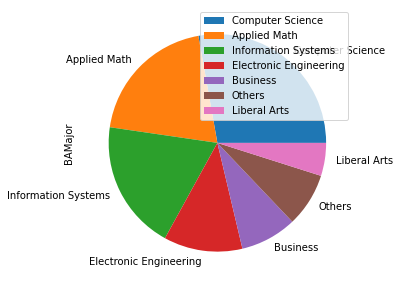

In [ ]:
df2 = pd.DataFrame({"BAMajor" : df['BAMajor'].value_counts()})
df2.plot.pie(y= "BAMajor", figsize = (5, 5))

In [ ]:
df.describe()

,ID,BAGPA,yrs_work,yrs_python,yrs_R,G1,G2,G3,G4,G5,...,G12,G13,G14,G15,G16,G17,G18,G19,G20,GPA
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.021050e+07,3.321730,1.697000,1.843000,1.46200,69.98386,69.441400,69.911810,72.084170,71.799900,...,69.623380,70.040860,54.006710,53.776260,53.825930,51.862680,52.512320,51.994020,19.996070,3.338980
std,2.888194e+02,0.305899,1.320202,1.111569,1.01271,14.71097,13.215629,13.157306,14.312964,14.920648,...,13.336301,13.217378,20.118087,20.515996,19.910985,15.826087,15.932887,16.637903,13.769642,0.263343
min,2.021000e+07,2.500000,0.000000,0.000000,0.00000,20.68000,19.870000,29.600000,34.170000,20.040000,...,20.070000,29.650000,11.680000,4.020000,9.850000,6.930000,4.740000,8.030000,-0.020000,2.540000
25%,2.021025e+07,3.130000,0.000000,1.000000,1.00000,61.35000,61.010000,61.310000,62.780000,62.200000,...,61.092500,61.447500,39.410000,38.690000,40.140000,41.240000,42.340000,39.410000,9.400000,3.150000
50%,2.021050e+07,3.270000,2.000000,2.000000,1.00000,71.09000,70.970000,71.220000,72.490000,73.615000,...,71.110000,71.260000,52.550000,54.195000,54.750000,52.550000,53.290000,51.470000,19.155000,3.330000
75%,2.021075e+07,3.460000,3.000000,3.000000,2.00000,80.32000,78.770000,79.057500,83.545000,83.545000,...,78.857500,79.140000,69.800000,69.800000,67.970000,62.140000,63.870000,63.870000,29.560000,3.500000
max,2.021100e+07,4.000000,4.000000,4.000000,4.00000,100.00000,100.000000,100.000000,99.450000,100.910000,...,100.000000,100.000000,98.900000,101.830000,102.560000,93.430000,90.520000,94.890000,55.850000,4.060000


<AxesSubplot:>

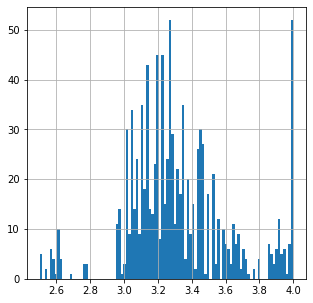

In [ ]:
df['BAGPA'].hist(bins=100, figsize = (5, 5))

<AxesSubplot:ylabel='Density'>

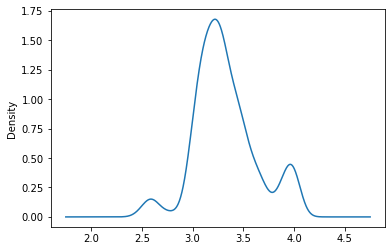

In [ ]:
df['BAGPA'].plot.density()

<AxesSubplot:ylabel='Density'>

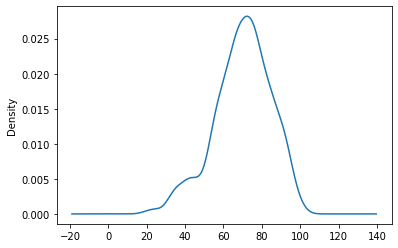

In [ ]:
df['G1'].plot.density()

<AxesSubplot:ylabel='Density'>

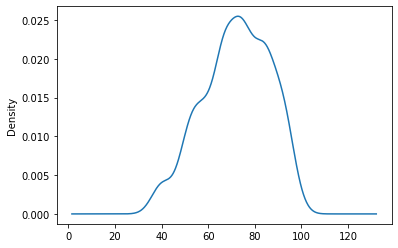

In [ ]:
df['G4'].plot.density()

<AxesSubplot:>

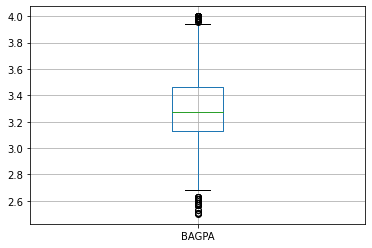

In [ ]:
df.boxplot(column = 'BAGPA')

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Applied Math'),
  Text(2, 0, 'Business'),
  Text(3, 0, 'Computer Science'),
  Text(4, 0, 'Electronic Engineering'),
  Text(5, 0, 'Information Systems'),
  Text(6, 0, 'Liberal Arts'),
  Text(7, 0, 'Others')])

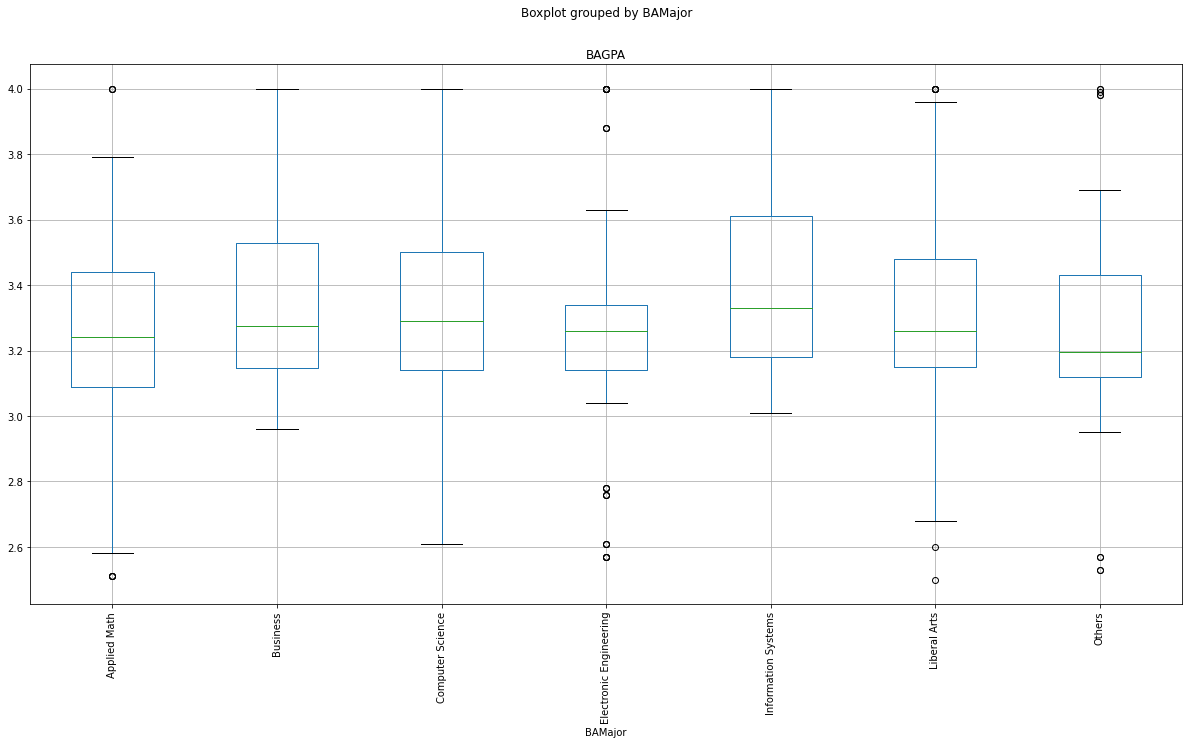

In [ ]:
df.boxplot(column = ['BAGPA'], by ='BAMajor', figsize = (20, 10))
plt.xticks(rotation=90)

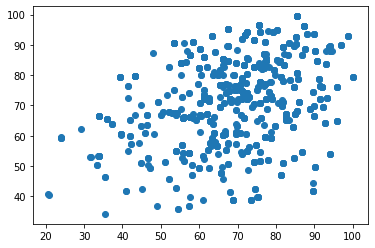

In [ ]:
plt.scatter(df['G1'], df['G4'])

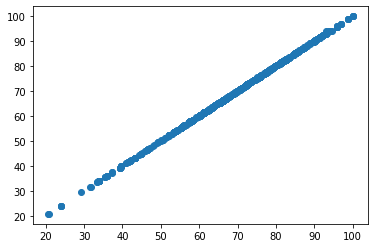

In [ ]:
plt.scatter(df['G1'], df['G11'])

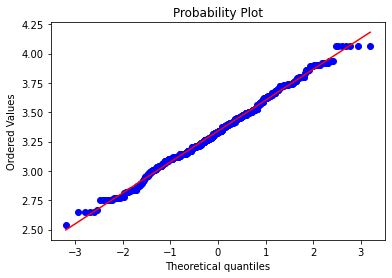

In [ ]:
qqplot = stats.probplot(df['GPA'], plot=plt)


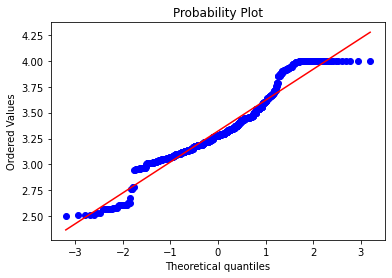

In [ ]:
qqplot = stats.probplot(df['BAGPA'], plot=plt)

In [ ]:
!pip install statsmodels==0.13.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 KB 46.9 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


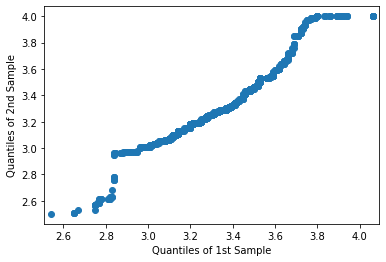

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

qqplot2sample = qqplot_2samples(sm.ProbPlot(df['GPA']), sm.ProbPlot(df['BAGPA']))

Data Understanding by Di Wu is licensed under [CC BY NC SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/).